In [100]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import scipy as sp
import math

In [150]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [15]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = 'AAPL'

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2017-06-26'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
aapl = data.DataReader(tickers, data_source, start_date, end_date)

In [234]:
# Add daily returns
aapl['Return'] = np.log(aapl['Close']/aapl['Close'].shift(1))
r = aapl['Return']
r = r.dropna()

In [277]:
# Add daily volatility for a 30-day window
aapl['Volatility'] = r.rolling(window=30).std()
sig = aapl['Volatility'].dropna()

In [278]:
aapl['Annual_Volatility'] = sig * math.sqrt(252)
ann_sig = aapl['Annual_Volatility']

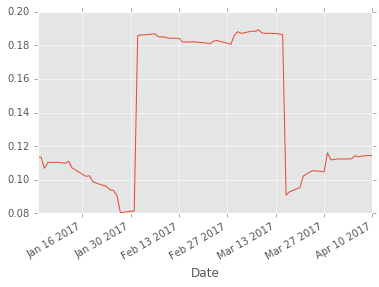

In [279]:
ann_sig.ix['2017-01-01':'2017-04-10'].plot()

### Overlook of data

In [162]:
np.mean(r), np.std(r)

(-0.0011727190223594524, 0.022590787788635963)

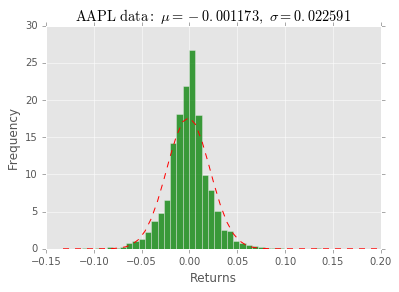

In [185]:
# the histogram of the data
n, bins, patches = plt.hist(r, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
mu, sigma = np.mean(r), np.std(r)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{AAPL\ data:}\ \mu=%f,\ \sigma=%f$'%(mu,sigma) )
plt.grid(True)

plt.show()

In [193]:
VaR = r.quantile(.05)
ES = r[r < VaR].mean()
print('Var = %.3f, ES = %.3f'%(VaR, ES))

Var = -0.038, ES = -0.054


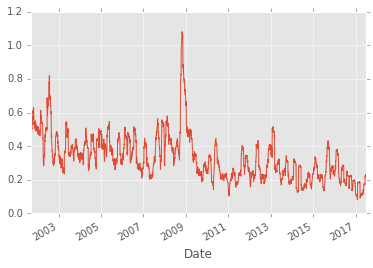

In [205]:
ann_sig.plot()